Import required libraries:

In [38]:
%matplotlib inline

import pandas as pd
import matplotlib.pyplot as plt
import sklearn

In [3]:
import sklearn.datasets

data = sklearn.datasets.load_boston()

In [8]:
features, labels = data['data'], data['target']

In [9]:
import sklearn.model_selection

We split our data into training and test sets:

In [10]:
train_features, dev_test_features, train_labels, dev_test_labels = \
  sklearn.model_selection.train_test_split(features, labels, train_size=0.8)

Check the size of train data:

In [11]:
len(train_features), len(train_labels)

(404, 404)

We split the test set into the development set and the test set itself:

In [12]:
dev_features, test_features, dev_labels, test_labels = \
  sklearn.model_selection.train_test_split(
    dev_test_features, dev_test_labels, train_size=0.5
  )

Check the size of the dev and the test datasets:

In [13]:
len(dev_features), len(dev_labels)

(51, 51)

In [14]:
len(test_features), len(test_labels)

(51, 51)

Create model:

In [18]:
import sklearn.tree



In [24]:
import sklearn.metrics

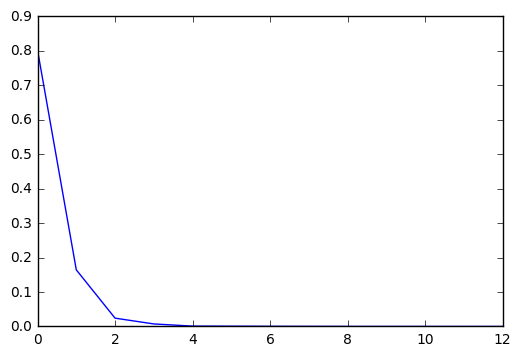

In [40]:
import sklearn.decomposition

pca = sklearn.decomposition.PCA()
pca.fit_transform(train_features).shape
plt.plot(pca.explained_variance_ratio_);

In [44]:
import sklearn.svm

for model in (
    sklearn.tree.DecisionTreeRegressor(),
    sklearn.svm.SVR(kernel='rbf', C=10000.0)
):
    model.fit(train_features, train_labels)
    for features, labels, name in [
        (train_features, train_labels, 'train'),
        (test_features, test_labels, 'test'),
        (dev_features, dev_labels, 'dev'),
    ]:
        predicted_labels = model.predict(features)
        mse = sklearn.metrics.mean_squared_error(labels, predicted_labels)
        print('%s %s MSE = %f' % (model, name, mse))

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_split=1e-07,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, presort=False, random_state=None,
           splitter='best') train MSE = 0.000000
DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_split=1e-07,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, presort=False, random_state=None,
           splitter='best') test MSE = 18.258039
DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_split=1e-07,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, presort=False, random_state=None,
           splitter='best') dev MSE = 13.179804
SVR(C=10000.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto'

2.99215686275
